In [1]:
import numpy as np
import matplotlib.pyplot as plt


def get_relay_curve(In=1, order=4):
    def relay_curve(I, *ks):
        t = 0
        for order, k in enumerate(ks):
            t += k*np.log10((I/In)-1)**order
        return 10**t
    return relay_curve

array([ 1.46030413, -1.49228738, -0.02331629,  0.29149188,  0.03091405,
       -0.04579965, -0.01074705])

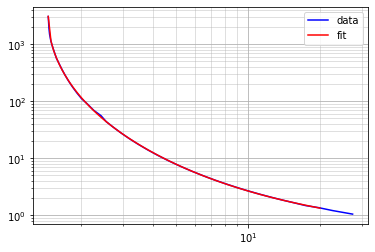

In [7]:
# Curve fitting upper

curve_u = np.genfromtxt('curve_u.csv', delimiter=',', dtype=float)
i_u = curve_u[:, 0]
t_u = curve_u[:, 1]


# relay_curve = lambda I, K4, K3, K2, K1, K0: 10**(K0 + K1*np.log10((I/In)-1) + K2*np.log10((I/In)-1)**2 + K3*np.log10((I/In)-1)**3  + K4*np.log10((I/In)-1)**4)
In=1.45
order=6
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_u)
ydata = np.array(t_u)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 20, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(coeff)

array([ 0.75760783, -1.5689532 ,  0.40594399,  0.49000588, -0.07748048,
       -0.14996402, -0.03150087])

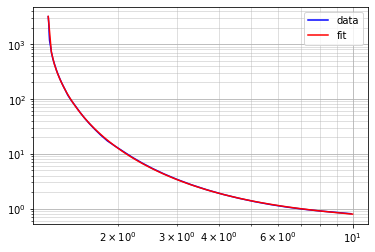

In [6]:
# Curve fitting lower

curve_l = np.genfromtxt('curve_l.csv', delimiter=',', dtype=float)
i_l = curve_l[:, 0]
t_l = curve_l[:, 1]

In=1.24
order=6
relay_curve = get_relay_curve(In, order)

xdata = np.array(i_l)
ydata = np.array(t_l)

xdata_mod = np.log10((xdata/In) -1)
ydata_mod = np.log10(ydata)
coeff = np.polyfit(xdata_mod, ydata_mod, order)[::-1]

plt.plot(xdata, ydata, 'b-', label='data')
x = np.geomspace(min(xdata), 10, num=100)
plt.plot(x, relay_curve(x, *list(coeff)), 'r-', label='fit')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='major', alpha=1)
plt.grid(True, which='minor', alpha=0.5)
plt.legend()
display(coeff)